# Internee.pk spam email detection

In [30]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# load data
df= pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [32]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

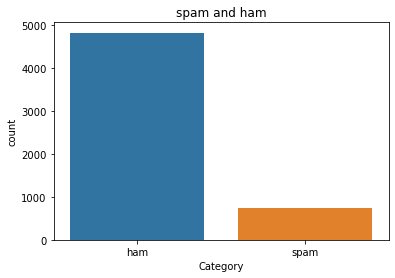

In [10]:
sns.countplot(data = df, x= df["Category"]).set_title("spam and ham")
plt.show()

In [14]:
# features
x = df['Message'].values
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [13]:
# labels
y = df['Category'].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Dataet splitting

In [18]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

# Converting string to integer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

# SVC

In [25]:
from sklearn.svm import SVC
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [27]:
pred_y=model.predict(x_test)

In [28]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, x_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[3867,    3],
       [ 111,  476]], dtype=int64)

In [31]:
# classification report
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



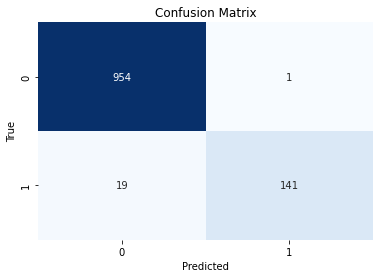

In [36]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model_lm= LogisticRegression()

model_lm.fit(x_train,y_train)
pred_y=model_lm.predict(x_test)

In [39]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_lm, x_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[3862,    8],
       [  82,  505]], dtype=int64)

In [40]:
# classification report
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.98      0.88      0.92       160

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



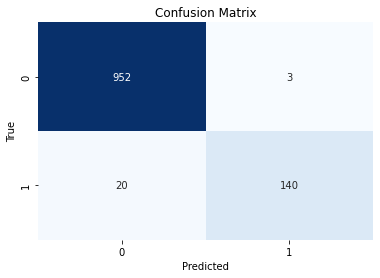

In [41]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
pred_y=model_knn.predict(x_test)

In [48]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_knn, x_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[3869,    1],
       [ 359,  228]], dtype=int64)

In [52]:
# classification report
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       955
        spam       1.00      0.54      0.70       160

    accuracy                           0.93      1115
   macro avg       0.96      0.77      0.83      1115
weighted avg       0.94      0.93      0.92      1115



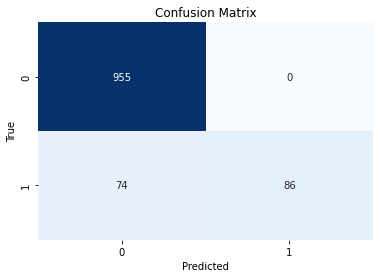

In [50]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['SVC','Logistic Regression', 'KNN'],
    'Score': [0.98,0.98,0.93]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.98,SVC
0.98,Logistic Regression
0.93,KNN
